# **Edge Detection**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


**Edge detection** in image processing is aimed at identifying boundaries within images. The edges in an image represent significant changes in intensity or color, which often correspond to object boundaries or transitions between different regions.

---

**Filter-based methods** are a category of techniques used in image processing for tasks such as edge detection, noise reduction, and feature extraction. These methods involve the application of convolutional filters to an input image. This process highlights certain features or characteristics within the image.

The three common filter-based methods are as follows:
- Sobel Operator: The Sobel operator is a popular filter for edge detection. It consists of two 3x3 convolutional kernels (one for horizontal changes and the other for vertical changes) that approximate the gradient of the image. The combined gradient magnitude helps identify edges
- Prewitt Operator: Similar to the Sobel operator, the Prewitt operator is used for edge detection. It employs two 3x3 convolutional kernels to calculate the gradient, emphasizing horizontal and vertical edges.
- Roberts Operator: A pair of 2x2 convolutional kernels to the input image. Particularly effective for detecting edges with diagonal orientiations.

---

The Gaussian filter is commonly used for smoothing or blurring an image. It is applied to reduce noise and remove fine details. Gaussian smoothing is often used as a preprocessing step before edge detection to improve the robustness of the algorithm

### **Applying a Custom Kernel**

In OpenCV, the `filter2D` function is commonly used to apply a custom kernel for convolution operations, including edge detection. This function convolves a kernel with an image, allowing you to perform various image processing tasks, such as blurring, sharpening, and edge detection

`cv2.filter2D(src, ddept, kernel)`
- src: The input image
- ddept: The desired depth of the output image. Write '-1' to keep the same depth as that of the input image.
- kernel: The convolution kernel

For this demonstration, let us use the same kernels used for the Sobel Operator.

In [2]:
img_GRAY = cv2.imread('data/images/butterfly.jpg', cv2.IMREAD_GRAYSCALE)

list_x = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
kernel_x = np.array(list_x)

list_y = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
kernel_y = np.array(list_y)

We will now apply the kernel to the image in both directions and take the magnitude of the result

In [3]:
edges_x = cv2.filter2D(img_GRAY, cv2.CV_64F, kernel_x)
edges_y = cv2.filter2D(img_GRAY, cv2.CV_64F, kernel_y)

edges_mag = np.sqrt(edges_x ** 2 + edges_y ** 2)

Let us visualize the effect of each kernel as well as their magnitude

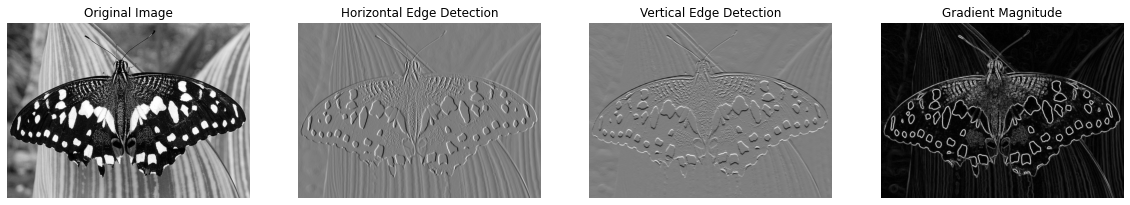

In [4]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 6))

ax1.imshow(img_GRAY, cmap = 'gray')
ax1.set_title("Original Image")
ax1.axis('off')

ax2.imshow(edges_x, cmap = 'gray')
ax2.set_title("Horizontal Edge Detection")
ax2.axis('off')

ax3.imshow(edges_y, cmap = 'gray')
ax3.set_title("Vertical Edge Detection")
ax3.axis('off')

ax4.imshow(edges_mag, cmap = 'gray')
ax4.set_title("Gradient Magnitude")
ax4.axis('off');

### **Sobel Operator**

The **Sobel operator** is a popular edge detection filter, and in OpenCV, it is implemented through the `cv2.Sobel` function. This operator is used to compute an approximation of the gradient of the image intensity, highlighting regions of significant intensity change, which often correspond to edges. The Sobel operator is especially effective for detecting edges in horizontal and vertical directions.

`cv2.Sobel(src, ddept, dx, dy, ksize = )`
- src: The input image
- ddept: The dept of the output image
- dx: Specifies whether to apply the Sobel operator along the x-direction (1 or 0)
- dy: Specifies whether to appply the Sobel operator along the y-direction (1 or 0)

In [5]:
img_GRAY = cv2.imread('data/images/fishes.jpg', cv2.IMREAD_GRAYSCALE)

edges_x = cv2.Sobel(img_GRAY, cv2.CV_64F, 1, 0, ksize = 3)
edges_y = cv2.Sobel(img_GRAY, cv2.CV_64F, 0, 1, ksize = 3)

edges_mag = np.sqrt(edges_x ** 2 + edges_y ** 2)

Let us visualize each kernel effect separately

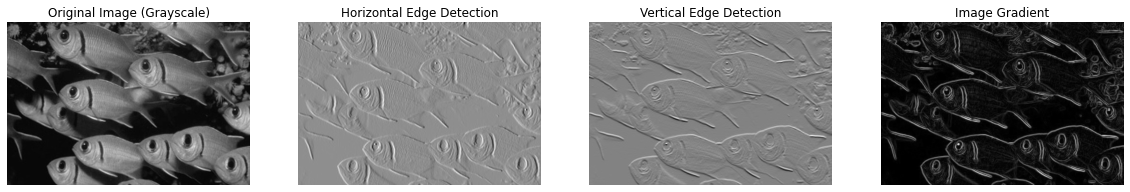

In [6]:
plt.figure(figsize = (20, 6))

plt.subplot(141)
plt.imshow(img_GRAY, cmap = 'gray')
plt.title('Original Image (Grayscale)')
plt.axis('off')

plt.subplot(142)
plt.imshow(edges_x, cmap = 'gray')
plt.title('Horizontal Edge Detection')
plt.axis('off')

plt.subplot(143)
plt.imshow(edges_y, cmap = 'gray')
plt.title('Vertical Edge Detection')
plt.axis('off')

plt.subplot(144)
plt.imshow(edges_mag, cmap = 'gray')
plt.title('Image Gradient')
plt.axis('off');

When both dx and dy are set to 1 in the Sobel operator, it means that you are computing the gradients in both the x (horizontal) and y (vertical) directions simultaneously

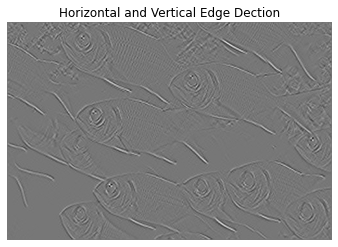

In [7]:
img_GRAY = cv2.imread('data/images/fishes.jpg', cv2.IMREAD_GRAYSCALE)
edges_xy = cv2.Sobel(img_GRAY, cv2.CV_64F, 1, 1)

plt.imshow(edges_xy, cmap = 'gray')
plt.axis('off')
plt.title("Horizontal and Vertical Edge Dection");

### **Canny Edge Detector**

The **Canny Edge Detector** is an edge detection algorithm that aims to identify the edges in an image. It well-known for its ability to detect edges accurately while minimizing false positives.

In OpenCV, the Canny Edge Detector is implemented using the `cv2.Canny()` function.

`cv2.Canny(image, threshold1, threshold2)`
- image: the source image
- threshold1: ...
- threshold2: ...

A high-level view of the algorithm is given below:
1. Smoothing (Gaussian Blur)
    - The first step is to apply a Gaussian Blur to the input image. This helps reduce noise and small variations in intensity, leaving only the strong edges in the image.
2. Gradient Calculation
    - After smoothing, the next step is to calculate the gradient of the image. The gradient represents the rate of change of intensity at each pixel. Commonly, the Sobel operator is used to compute the gradient in both the horizontal and vertical directions.
    - From the gradients, the edge strength and orientation at each pixel are calculated. The edge strength is the magnitude of the gradient, and the orientation is the direction of the gradient
3. Non-Maximum Suppression
    - Non-maximum suppression is applied to thin the edges. For each pixel, the algorithm checks if the edge strength is the maximum in the direction of the gradient. If not, the pixel value is suppressed, reducing the width of the detected edges
4. Double Thresholding
    - A double thresholding mechanism is used to classify pixels as strong, weak, or non-edges. If the edge strength is above a high threshold, the pixel is considered a strong edge. If the strength is below a low threshold, it is classified as a non-edge. Pixels with values between the high and low thresholds are labeled as weak edges
5. Edge Tracking by Hysteresis
    - The final step is edge tracking by hysteresis. It involves connecting strong edges and suppressing weak edges. Weak edges are included in the final edge map only if they are connected to strong edges. This helps eliminate isolated weak responses caused by noise

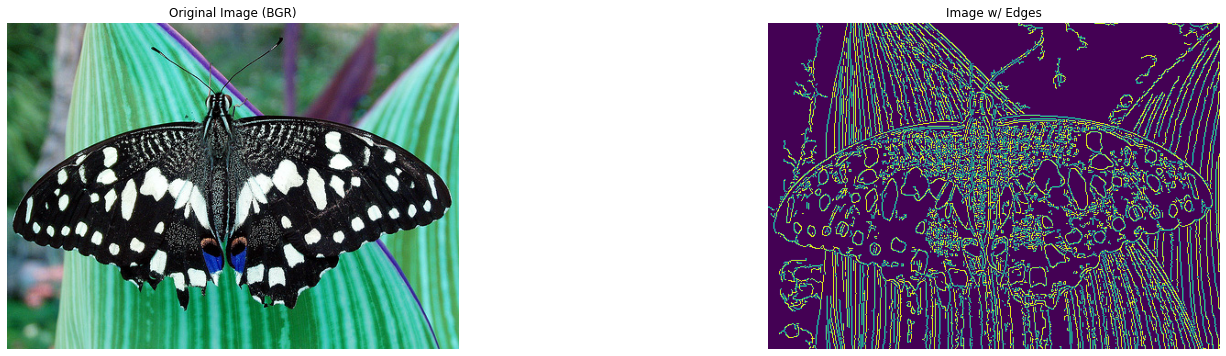

In [8]:
img = cv2.imread('data/images/butterfly.jpg')
img_with_edges = cv2.Canny(img, threshold1 = 50, threshold2 = 150)


plt.figure(figsize = (25, 6))

plt.subplot(121)
plt.title("Original Image (BGR)")
plt.imshow(img)
plt.axis('off')

plt.subplot(122)
plt.title("Image w/ Edges")
plt.imshow(img_with_edges)
plt.axis('off');

How can we improve on the result above? The first thing we can do is add on our own blur to the input image. Keep in mind that the `cv2.Canny()` function does apply its own blur as well. The second thing is to use more judicious values for the thresholds. 

The lower threshold is set to to be the maximum of 0 and 70% of the median value of the image. The upper threshold is set to be the minimum of 255 and 1.3 times the median value of the image.

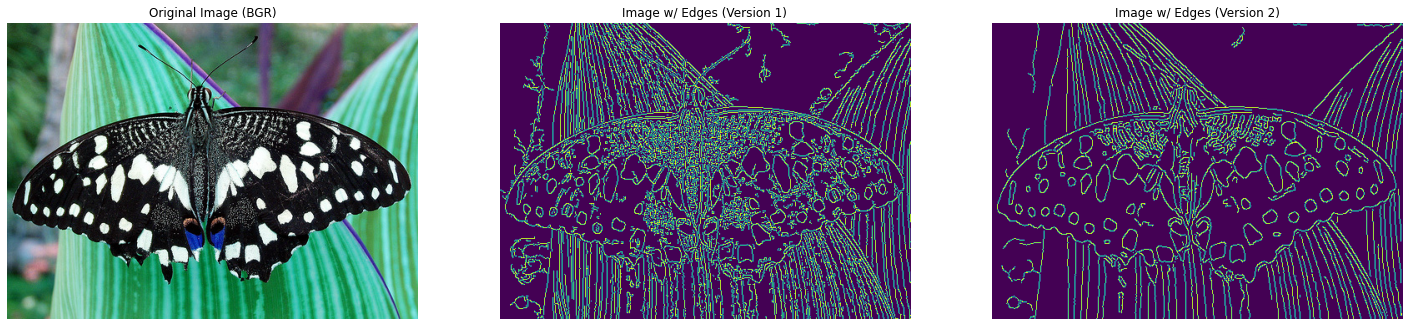

In [9]:
img = cv2.imread('data/images/butterfly.jpg')
img_blurred = cv2.GaussianBlur(img, (5,5), 2)

img_with_edges_1 = cv2.Canny(img, 50, 150)

median_value = np.median(img)
lower_threshold = int(max(0, 0.7 * median_value))
upper_threshold = int(min(255, 1.3 * median_value))

img_with_edges_2 = cv2.Canny(img_blurred, lower_threshold, upper_threshold)

plt.figure(figsize = (25, 6))

plt.subplot(131)
plt.title("Original Image (BGR)")
plt.imshow(img)
plt.axis('off')

plt.subplot(132)
plt.title("Image w/ Edges (Version 1)")
plt.imshow(img_with_edges_1)
plt.axis('off')

plt.subplot(133)
plt.title("Image w/ Edges (Version 2)")
plt.imshow(img_with_edges_2)
plt.axis('off');